In [62]:
import pandas as pd
import numpy as np

# Pretty display for notebooks
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#pandas options
pd.set_option('display.max_columns', 28)

#Load data
data_analysis= pd.read_csv('data_lymph.csv',header=0, index_col=0)
data_analysis.head()

,Node-coded,ERBB2,SCUBE1,ETFA,IGSF1,MAGEA4,HLA-DQA1,CACNB2,CACNB2.1,MIEN,BRCA1,TMEM49,MAP3K9,PCP4L1,KIAA1804,FRMD1,EIF4E1B,LRFN4,CBS,MMP7,TCL1A,COQ10A,CARTPT,C10ORF54,PAGE2,CENPI,ANKRD62,TSPAN6
0,1,-5.187379,-3.661885,1.332770,0.232140,8.341345,2.995425,-3.394254,-2.768668,-2.808812,-0.430246,-2.650715,-8.572905,2.911791,-0.908635,-10.245596,3.895333,-10.275596,4.280052,-1.751672,1.593710,-0.530607,-13.313311,-7.974082,-8.894062,-13.470544,-10.998307,-3.859262
1,1,-2.960521,-1.087716,0.486621,-3.741130,-0.116875,0.279989,-0.874524,-2.153673,0.342307,0.909724,-2.229335,1.014680,-1.809287,0.040559,1.250831,2.680853,3.635295,-2.261909,-5.833686,-3.206511,-2.789968,-12.295028,-1.714171,-11.960481,0.122556,-2.317667,-1.094276
2,1,-0.504402,-2.947371,-0.610459,-0.760401,-8.374565,3.240509,1.265654,1.265654,1.733767,-0.924973,2.421310,-3.901884,6.458791,-3.901884,1.053540,-2.892514,-1.009087,-5.770682,-6.845881,-1.755143,2.940623,-10.894334,0.058798,-6.725195,3.357537,2.852852,1.613082
3,0,-3.894260,1.024485,-1.756657,5.416356,-10.709752,-1.162042,-2.629763,-2.629763,-2.166866,-2.720084,-6.351751,-3.852863,-2.087835,-3.852863,-8.880746,0.625566,-9.223214,-5.267896,-6.957656,-0.033027,2.684138,-11.789843,-1.297524,-10.623194,-9.351170,-5.982939,-0.021736
4,0,0.039529,-5.432634,-4.176997,-3.488864,-6.219463,-1.821993,-5.174927,-3.409359,-0.056425,-7.902784,0.080653,-0.349577,-3.063922,-1.447235,-3.081595,2.317770,-5.564924,-3.387427,-4.028953,-3.392910,1.127931,-7.247550,-0.577323,-12.760836,-3.154394,-5.035107,-0.983074


In [63]:
features=list(data_analysis.columns)[1:]
target='Node-coded'

X=data_analysis[features]
y=data_analysis[target]

print 'Total number of tumours: ',X.shape[0]
print 'Total number of features: ',X.shape[1]
print 'Number of tumours lymph node negative (label 0):',data_analysis[data_analysis['Node-coded']==0].shape[0]
print 'Number of tumours lymph node positive (label 1):',data_analysis[data_analysis['Node-coded']==1].shape[0]


Total number of tumours:  77
Total number of features:  27
Number of tumours lymph node negative (label 0): 39
Number of tumours lymph node positive (label 1): 38


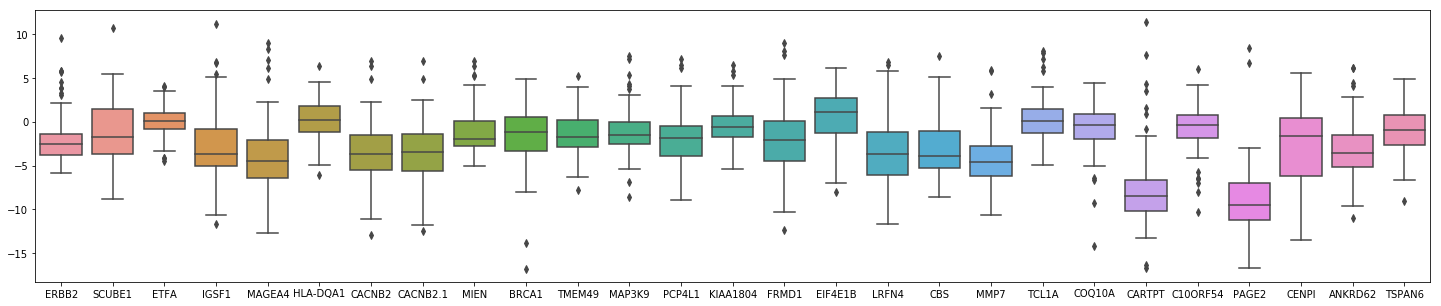

In [64]:
#Box plot of the features
f, ax = plt.subplots(figsize=(25, 5))
sns.boxplot(data=X)

In [65]:
#Splitting data, crossvaluation
from sklearn.model_selection import cross_val_predict
# Classification model: Logistic Regression
from sklearn.linear_model import LogisticRegression
#Evaluation metrics
from sklearn.metrics import classification_report

print''
print '   Classification breast cancer respect lymph node code invasion'
print '                Logistic Regression model'
print''

y_pred = cross_val_predict(LogisticRegression(C=0.2), X, y, cv=20)

print classification_report(y, y_pred)


   Classification breast cancer respect lymph node code invasion
                Logistic Regression model

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        39
           1       0.90      0.92      0.91        38

   micro avg       0.91      0.91      0.91        77
   macro avg       0.91      0.91      0.91        77
weighted avg       0.91      0.91      0.91        77



In [66]:
from scipy.stats import ttest_ind
#Select proteins with significant differences (p<=0.01)
t_01=[]

for feature in features:
    category_0= data_analysis[feature][data_analysis['Node-coded']==0]
    category_1= data_analysis[feature][data_analysis['Node-coded']==1]
    
    # Calculate T-test / returns statistic, pvalue 
    ttest=ttest_ind(category_0, category_1, equal_var=False)
    

#Select proteins with a probability p<=0.01   
    if ttest[1]<=0.01:
        #print 'feature',feature
        
        print 'Feature',feature,'  mean category_0',round(category_0.mean(),3),'  mean category_1', round(category_1.mean(),3),'  probability', round(ttest[1],4)
                
        t_01.append(feature)
        
#print t_01 ,len(t_01)        

    

Feature ERBB2   mean category_0 -2.788   mean category_1 -0.764   probability 0.0032
Feature ETFA   mean category_0 -0.508   mean category_1 0.617   probability 0.0026
Feature MIEN   mean category_0 -1.991   mean category_1 -0.19   probability 0.003
Feature MAP3K9   mean category_0 -2.374   mean category_1 0.117   probability 0.0001
Feature KIAA1804   mean category_0 -1.443   mean category_1 0.527   probability 0.0001
Feature EIF4E1B   mean category_0 -0.399   mean category_1 1.556   probability 0.0052


Node_coded negative samples :  Int64Index([ 3,  4,  5,  7,  8,  9, 10, 12, 13, 15, 16, 17, 20, 22, 25, 26, 29,
            32, 33, 34, 35, 36, 37, 41, 42, 43, 46, 48, 49, 50, 53, 54, 58, 59,
            63, 64, 71, 73, 75],
           dtype='int64')
Node-coded positive samples :  Int64Index([ 0,  1,  2,  6, 11, 14, 18, 19, 21, 23, 24, 27, 28, 30, 31, 38, 39,
            40, 44, 45, 47, 51, 52, 55, 56, 57, 60, 61, 62, 65, 66, 67, 68, 69,
            70, 72, 74, 76],
           dtype='int64')


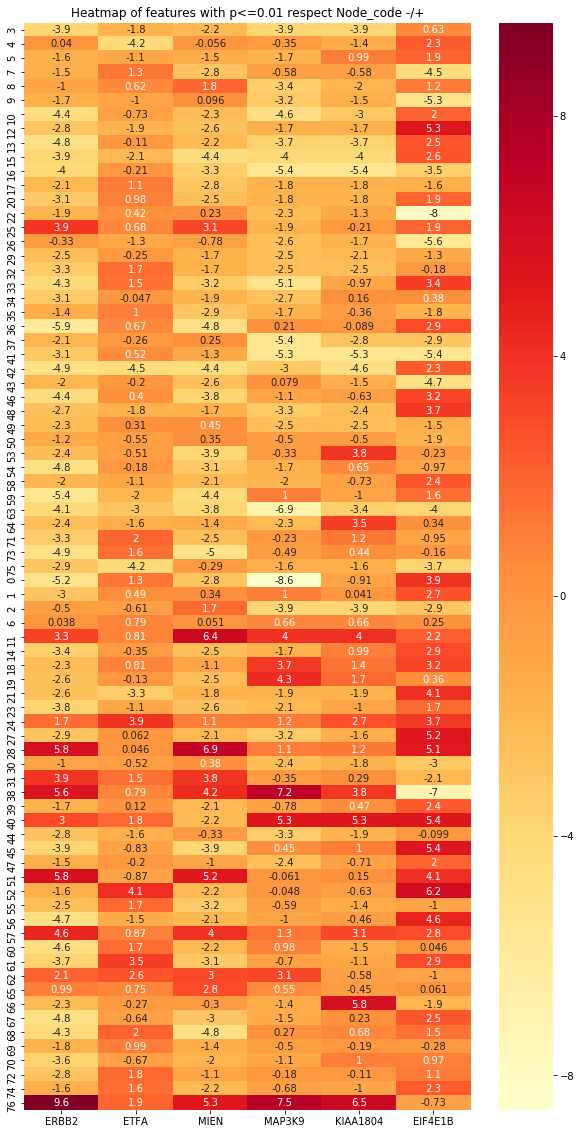

In [69]:
#Visualization: heatmap of  features with sighnificant differencesfor tumours:

category_0= data_analysis[data_analysis['Node-coded']==0]
category_1= data_analysis[data_analysis['Node-coded']==1]

samples=list(category_0.index) +list(category_1.index)
print 'Node_coded negative samples : ', category_0.index
print 'Node-coded positive samples : ', category_1.index

#size of the figure
f, ax = plt.subplots(figsize=(10, 20))
title=plt.title('Heatmap of features with p<=0.01 respect Node_code -/+', loc='center')
min_value=X[t_01].loc[samples].min().min()
max_value=X[t_01].loc[samples].max().max()
sns.heatmap(X[t_01].loc[samples],vmin=min_value,vmax=max_value,cmap='YlOrRd', annot=True,ax=ax)